In [1]:
import os

import h5py
import matplotlib.pyplot as plt
import pandas as pd

from src.data.tf_data import TFDataCreator
from src.data.data_augmentation import preprocess_ct
from src.models.models import Unet, BLRIUnet

%matplotlib inline

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
file = h5py.File("../data/processed/Task08_HepaticVessel_training.hdf5", "r")

In [4]:
data_creator = TFDataCreator(file,
                             patch_size=(128, 128, 128),
                             shuffle=True,
                             params_augmentation={
                                 "rotation": False,
                                 "random_center": False,
                             })
ds = data_creator.get_tf_data(data_augmentation=True)


In [5]:
df = pd.DataFrame()
for k in file.keys():
    shape = file[k]["image"][()].shape
    df = pd.concat([df, pd.DataFrame({
        "shape_0": [shape[0]],
        "shape_1": [shape[1]],
        "shape_2": [shape[2]],
    }, index=[k])])


KeyboardInterrupt: 

In [6]:
image = file[k]["image"][()]
image.shape

(594, 594, 288)

In [10]:
origin = data_creator._get_origin_from_center((608, 64, 64), image_shape=image.shape)

In [11]:
im = image[origin[0]:origin[0] + 128, origin[1]:origin[1] + 128, origin[2]:origin[2] + 128]

In [12]:
im.shape

(128, 128, 128)

In [13]:
df.min()

shape_0    375
shape_1    375
shape_2    188
dtype: int64

In [14]:
yo = ds.batch(4).as_numpy_iterator()

In [15]:
x, y = next(yo)

In [16]:
y.shape

(4, 128, 128, 128, 3)

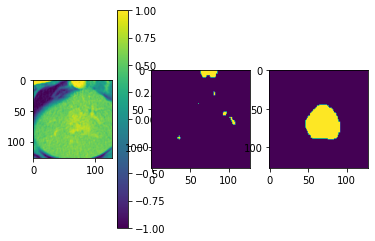

In [21]:
s = 63
b = 3
plt.subplot(1, 3, 1)
plt.imshow(x[b, :, :, s, 0])
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(y[b, :, :, s, 1])
plt.subplot(1, 3, 3)
plt.imshow(y[b, :, :, s, 2])


In [ ]:
model = Unet(output_channels=2, last_activation="softmax", n_features=[12, 24, 48, 96, 192])

In [ ]:
y_pred = model(x)

In [ ]:
s = 63
b = 0
plt.subplot(1, 3, 1)
plt.imshow(x[b, :, :, s, 0])
plt.subplot(1, 3, 2)
plt.imshow(y[b, :, :, s, 0])
plt.subplot(1, 3, 3)
plt.imshow(y_pred[b, :, :, s, 0])
